In [1]:
import numpy as np
import cv2 as cv
from feature_description.sift_descriptor import SIFTDescriptor
from optical_flow.gu import Gu
from optical_flow.bounding_box import BoundingBox
from matplotlib import pyplot as plt

In [2]:
video_path = "/workspaces/python-opencv/repo/videos/IMG_0165.MOV"
# video_path = "/workspaces/python-opencv/repo/videos/0001-0090.mkv"
out_path = "/workspaces/python-opencv/repo/out/gu.mp4"
target_size = (540, 960)[::-1]

In [3]:
cap = cv.VideoCapture(video_path)
ret, frame = cap.read()

frame = cv.resize(frame, target_size, dst = frame)

x, y, w, h = 350, 125, 250, 350
# x, y, w, h = 670, 250, 600, 600
track_window = (x, y, w, h)

In [4]:
fourcc = cv.VideoWriter_fourcc(*'mp4v')
video_out = cv.VideoWriter(out_path, fourcc, 30, target_size)

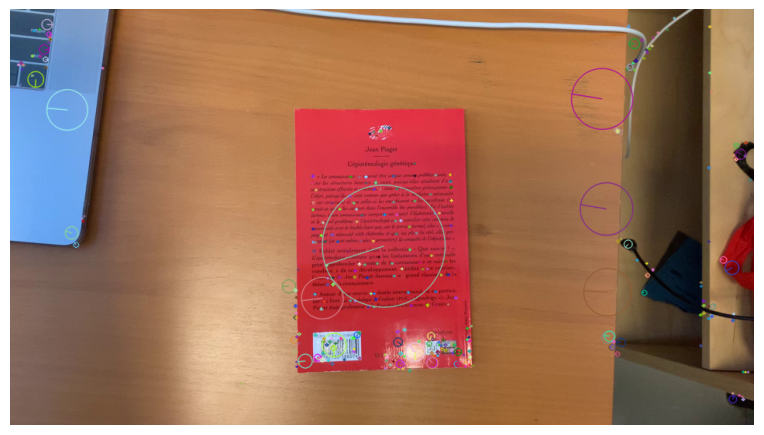

In [5]:
gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
 
sift = cv.SIFT_create()
kp = sift.detect(gray,None)


test_frame = cv.drawKeypoints(frame, kp, None, flags = cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
 
fig, ax = plt.subplots(figsize=(test_frame.shape[1] / 100, test_frame.shape[0] / 100))
plt.imshow(test_frame[:, :, ::-1])

ax.set_aspect('auto')

ax.axis('off')
plt.show()

In [6]:
bbox = BoundingBox(x, y, w, h)
descriptor = SIFTDescriptor(params = {"sigma" : 5})

In [7]:
img2 = cv.rectangle(test_frame, (x, y),  (x + w, y + h), 255, 2)
video_out.write(img2)

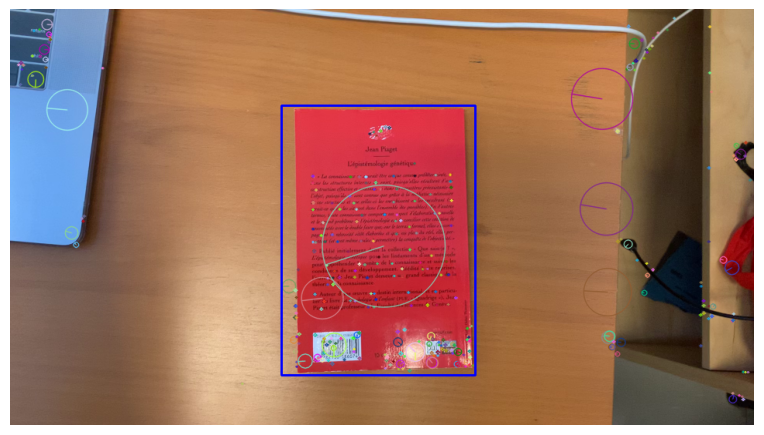

In [8]:
fig, ax = plt.subplots(figsize=(test_frame.shape[1] / 100, test_frame.shape[0] / 100))
plt.imshow(img2[:, :, ::-1])

ax.set_aspect('auto')

ax.axis('off')
plt.show()

In [9]:
gu = Gu(frame, bbox, descriptor)

In [10]:
gu._compute_kappa(bbox, bbox)

np.float64(0.0)

In [11]:
gu.track_frame(frame)

-28.0


BoundingBox(x=349, y=124, w=252, h=351)

In [12]:
while True:
    ret, frame = cap.read()
    
    if not ret:
        break

    frame = cv.resize(frame, target_size, dst = frame)
    
    my_bbox = gu.track_frame(frame)

    frame2 = cv.rectangle(frame, (my_bbox.x, my_bbox.y), (my_bbox.x + my_bbox.w, my_bbox.y + my_bbox.h), 255, 2)
    gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    kp = sift.detect(gray, None)
    frame2 = cv.drawKeypoints(frame2, kp, None, flags = cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

    video_out.write(frame2)

-22.0
-25.0
-24.0
-24.0
-26.0
-23.0
-24.0
-20.0
-21.0
-21.0
-19.0
-24.0
-19.0
-21.247265625
-26.0
-22.0
-22.0
-22.0
-25.0
-23.0
-24.0
-23.728372361123647
-25.0
-21.0
-20.0
-20.0
-21.72921524780727
-21.0
-23.849714285714285
-25.0
-22.0
-20.0
-27.0
-26.0
-28.0
-31.0
-27.0
-25.0
-25.0
-29.0
-19.0
-24.0
-24.648440702129555
-29.849499714122356
-24.0
-23.0
-31.0
-22.0
-27.0
-26.0
-27.0
-27.0
-28.947759684563586
-26.7
-26.8
-27.8
-23.8
-20.9
-16.9
-18.0
-17.54952517907532
-24.0
-23.0
-26.0
-25.0
-19.0
-30.0
-27.0
-26.0
-25.0
-24.9
-24.9
-24.8
-22.9
-23.0
-26.0
-22.0
-17.64889705882353
-22.0
-24.0
-24.0
-25.0
-27.0
-30.0
-18.0
-25.0
-30.0
-25.0
-20.0
-26.0
-27.5
-29.6
-25.7
-25.6
-22.9
-27.8
-24.8
-26.7
-26.6
-28.0
-23.196787148594378
-28.0
-25.0
-22.0
-21.0
-19.0
-16.0
-15.0
-19.0
-16.0
-14.0
-17.0
-17.0
-15.0
-15.0
-16.0
-16.0
-17.0
-19.0
-16.0
-17.0
-19.34808429118774
-14.397123077181503
-21.8
-19.5
-21.995498186815443
-17.5
-12.99955022347683
-18.9
-15.7
-16.7
-12.2
-11.9
-9.5
-12.0
-12.6


In [13]:
cap.release()
video_out.release()
cv.destroyAllWindows()

In [14]:
# cap = cv.VideoCapture(video_path)
# ret, frame = cap.read()
# bbox = BoundingBox(x, y, w, h)
# descriptor = SIFTDescriptor()
# gu = Gu(frame, bbox, descriptor)
# # img_render = cv.rectangle(frame, (x, y),  (x + w, y + h), 255, 2)
# # video_out.write(img2)
# fourcc = cv.VideoWriter_fourcc(*'mp4v')
# video_out = cv.VideoWriter(out_path, fourcc, 30, frame.shape[0:2][::-1])
# for i in range(60):
#     my_frame = np.roll(frame, shift=i, axis=1)
#     bbox_next = gu.track_frame(my_frame)

#     img2 = cv.rectangle(my_frame, (bbox_next.x, bbox_next.y), (bbox_next.x + bbox_next.w, bbox_next.y + bbox_next.h), 255, 2)

#     print(bbox_next)
#     video_out.write(img2)
# cap.release()
# video_out.release()
# cv.destroyAllWindows()